In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
#to ignore warnings

warnings.simplefilter('ignore')

#to display needed number of columns

pd.set_option('display.max_columns',30)

In [10]:
movies = pd.read_csv("C:/Users/ajdie/datasets/movie lens/movies.dat",
                        sep="::", header=None, names=['MovieID','Title','Genres'], 
                        dtype={'MovieID': np.int32, 'Title': str, 'Genres': str}, engine='python')
users = pd.read_csv("C:/Users/ajdie/datasets/movie lens/users.dat",
                        sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
        dtype={'UserID': np.int32, 'Gender': str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : str}, engine='python')
ratings = pd.read_csv("C:/Users/ajdie/datasets/movie lens/ratings.dat",
                        sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                        dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : str}, engine='python')

In [11]:
print('Movies Dataset Shape: ',movies.shape)
print('Users Dataset Shape: ',users.shape)
print('Ratings Dataset Shape: ',ratings.shape)

Movies Dataset Shape:  (3883, 3)
Users Dataset Shape:  (6040, 5)
Ratings Dataset Shape:  (1000209, 4)


In [12]:
#merge two datasets, movies and ratings, on the key MovieID

movie_ratings = pd.merge(movies,ratings,how='inner',on='MovieID')

In [13]:
#merging the third dataset, users, on the key UserID

df_final = pd.merge(movie_ratings,users,how='inner',on='UserID')

In [14]:
#creating master data with necessary columns

master_data = df_final[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]

In [15]:
#check for duplicates

master_data.duplicated().sum()

0

In [16]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int32 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int32 
 3   Age         1000209 non-null  int32 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int32 
 6   Rating      1000209 non-null  int32 
dtypes: int32(5), object(2)
memory usage: 42.0+ MB


In [17]:
#TASK 1: USER AGE DISTRIBUTION

age_dist = master_data['Age'].value_counts().to_frame()
age_dist.sort_index(inplace=True)
age_dist

,Age
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


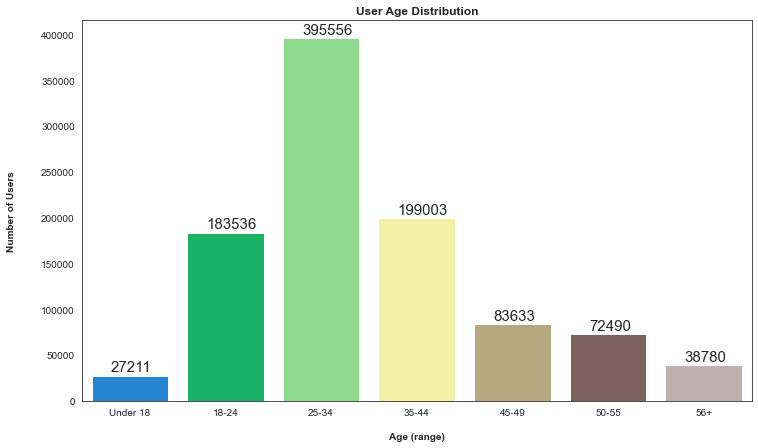

In [18]:
plt.figure(figsize=(12,7))
txt = {'weight':'bold'}
sns.set_style('white')
sns.countplot(x='Age',data=master_data,palette='terrain')
plt.title("User Age Distribution",fontdict=txt)
plt.xlabel("Age (range)",fontdict=txt,labelpad=15)
plt.ylabel("Number of Users",fontdict=txt,labelpad=25)
plt.xticks([0,1,2,3,4,5,6],["Under 18","18-24","25-34","35-44","45-49","50-55","56+"])
for i in range(7):
    plt.annotate(age_dist['Age'].iloc[i],xy=(i-0.2,age_dist['Age'].iloc[i]+5000),size=15)

plt.show()

In [19]:
#GENDER DISTRIBUTION

gender_group = users.groupby('Gender').size()
gender_group

Gender
F    1709
M    4331
dtype: int64

[4331, 1709]
['Male', 'Female']


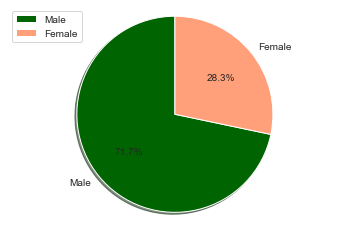

In [20]:
gender = ['Male','Female']
gender_count = [4331,1709]


sizes = gender_count
print(sizes)
labels = list(gender)

print(labels)
colors = ['darkgreen', 'lightsalmon']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.legend()
plt.show()

In [21]:
#TASK 2: USER RATING OF THE MOVIE "TOY STORY"

toy_story_df = master_data[master_data['Title'] == "Toy Story (1995)"]
ts_rating = toy_story_df['Rating'].value_counts().sort_index()
ts_rating_org = ts_rating.to_frame()
ts_rating_org

,Rating
1,16
2,61
3,345
4,835
5,820


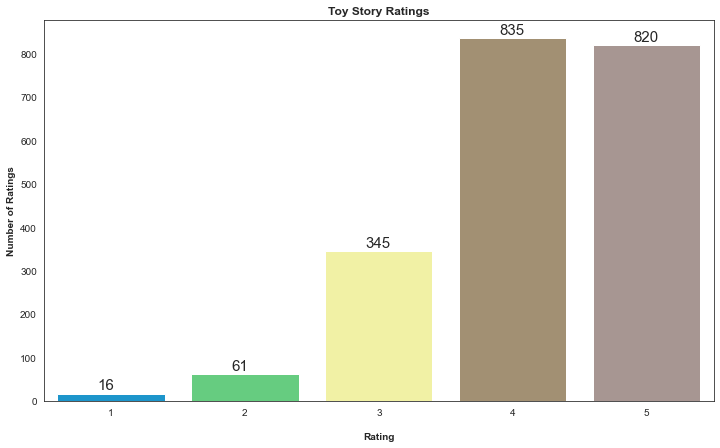

In [22]:
plt.figure(figsize=(12,7))
txt = {'weight':'bold'}
sns.set_style('white')
sns.countplot(x='Rating',data=toy_story_df,palette='terrain')
plt.title("Toy Story Ratings",fontdict=txt)
plt.xlabel("Rating",fontdict=txt,labelpad=15)
plt.ylabel("Number of Ratings",fontdict=txt,labelpad=4)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"])
for i in range(5):
    plt.annotate(ts_rating_org['Rating'].iloc[i],xy=(i-0.1,ts_rating_org['Rating'].iloc[i]+10),size=15)

plt.show()

In [23]:
print("Average Rating for Toy Story is {:.2f}".format(toy_story_df['Rating'].mean()))

Average Rating for Toy Story is 4.15


In [24]:
#3: TOP 25 MOVIES BY VIEWERSHIP RATING

top_25_movies = pd.DataFrame(master_data.groupby('Title')['Rating'].agg('mean')).sort_values(by='Rating',ascending=False).head(25)
top_25_movies['Title'] = top_25_movies.index
top_25_movies.index = range(1,26)
top_25_movies[['Title','Rating']]

,Title,Rating
1,Ulysses (Ulisse) (1954),5.000000
2,Lured (1947),5.000000
3,Follow the Bitch (1998),5.000000
4,Bittersweet Motel (2000),5.000000
5,Song of Freedom (1936),5.000000
6,One Little Indian (1973),5.000000
7,Smashing Time (1967),5.000000
8,Schlafes Bruder (Brother of Sleep) (1995),5.000000
9,"Gate of Heavenly Peace, The (1995)",5.000000
10,"Baby, The (1973)",5.000000


In [25]:
#TASK 4: FIND THE RATINGS FOR ALL THE MOVIES REVIEWED BY A PARTICULAR USER OF USER ID = 2696

userID_2696 = master_data[master_data['UserID'] == 2696]
userID_2696 = userID_2696.sort_values('Rating',ascending=False,ignore_index=True)
userID_2696[['MovieID','Title','Rating']]

,MovieID,Title,Rating
0,800,Lone Star (1996),5
1,1645,"Devil's Advocate, The (1997)",4
2,1783,Palmetto (1998),4
3,1092,Basic Instinct (1992),4
4,3176,"Talented Mr. Ripley, The (1999)",4
5,1258,"Shining, The (1980)",4
6,2389,Psycho (1998),4
7,1892,"Perfect Murder, A (1998)",4
8,1617,L.A. Confidential (1997),4
9,1625,"Game, The (1997)",4


In [26]:
#FEATURE ENGINEERING
#FE TASK 1: FIND OUT ALL THE UNIQUE GENRES

genres = df_final['Genres']
genres.head()

0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genres, dtype: object

In [27]:
#for loop to store the splitted genre data and append to a list

genre_list=[]

for row in genres:
    row_list = row.split("|")
    
    for i in range(len(row_list)):
        genre_list.append(row_list[i])

In [28]:
#finding unique genres and number of unique genres

unique_genres = list(set(genre_list))
print(unique_genres)
print()
print("Total Unique Genres: ",len(unique_genres))

['Romance', 'Western', 'Thriller', 'Documentary', 'Film-Noir', 'Horror', 'Comedy', 'Drama', 'Adventure', 'Animation', 'Fantasy', 'War', 'Mystery', 'Action', 'Crime', "Children's", 'Sci-Fi', 'Musical']

Total Unique Genres:  18


In [29]:
#FE TASK 2: SEPERATE COLUMNS FOR ONE-HOT ENCODING

onehot_encode = df_final.copy()
onehot_encode.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [30]:
#converting categorical variable to numerical variable

dummy = onehot_encode['Genres'].str.get_dummies()
dummy.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [31]:
#merging the final dataset with the newly created onehotcode based on index

final_dataset = pd.merge(onehot_encode,dummy,how='inner',left_index=True,right_index=True)
print("Final dataset shape: ",final_dataset.shape)
final_dataset.head()

Final dataset shape:  (1000209, 28)


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [32]:
#converting categorical column "Gender" into numerical column

gender_dummy = final_dataset['Gender'].str.get_dummies()

In [33]:
#merging the new numerical column to final dataset based on index

final_dataset = pd.merge(final_dataset,gender_dummy,how='inner',left_index=True,right_index=True)
final_dataset.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


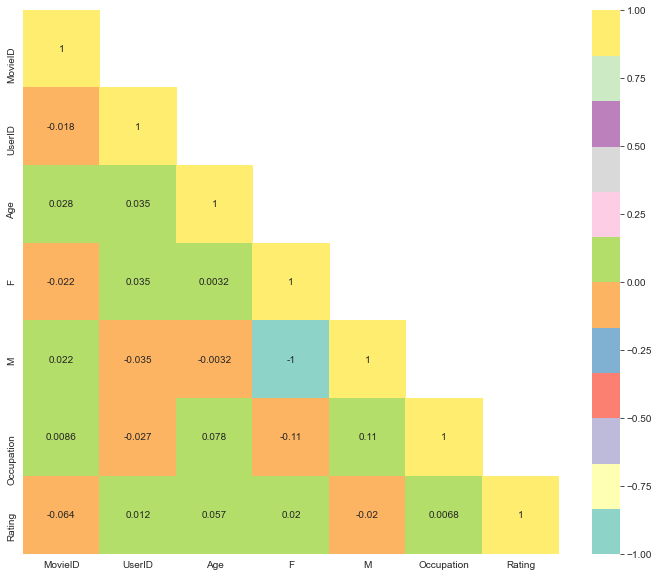

In [34]:
#FE TASK 3: DETERMINE THE FEATURES AFFECTING THE RATINGS OF ANY PARTICULAR MOVIE

m = np.ones_like(final_dataset[["MovieID","UserID","Timestamp","Age","F","M","Occupation","Rating"]].corr())
m[np.tril_indices_from(m)]=0
sns.set_style('white')
plt.figure(figsize=(12,10))
sns.heatmap(final_dataset[["MovieID","UserID","Timestamp","Age","F","M","Occupation","Rating"]].corr(),annot=True,cmap="Set3",mask=m)
plt.show()

In [35]:
#create a new dataframe with only continuous data and dummies

features = final_dataset[['MovieID','UserID','F','M','Timestamp','Age','Occupation','Action','Adventure','Animation',
                          "Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
                          'Mystery','Romance','Sci-Fi','Thriller','War','Western','Rating']]

In [36]:
#store features and target variable

x = features.drop(['Rating'],axis=1)
y = features['Rating']

In [37]:
#feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
#selecting 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization

featuresScores = pd.concat([dfcolumns,dfscores],axis=1)
featuresScores.columns = ['Features','Score']

print(featuresScores.nlargest(10,'Score'))

     Features         Score
4   Timestamp  1.638876e+08
0     MovieID  3.341344e+06
1      UserID  1.720993e+05
5         Age  1.865494e+04
14      Drama  9.705111e+03
17     Horror  9.192491e+03
23        War  6.405101e+03
16  Film-Noir  3.826022e+03
21     Sci-Fi  1.845628e+03
7      Action  1.734519e+03


In [39]:
#features selected are stored in a dataframe

feature_selected_df = features[['Timestamp', 'MovieID', 'UserID', 'Age', 'Drama', 'Horror', 'War', 'Film-Noir', 'Sci-Fi', 
                                'Action']]
feature_selected_df

,Timestamp,MovieID,UserID,Age,Drama,Horror,War,Film-Noir,Sci-Fi,Action
0,978824268,1,1,1,0,0,0,0,0,0
1,978824351,48,1,1,0,0,0,0,0,0
2,978301777,150,1,1,1,0,0,0,0,0
3,978300760,260,1,1,0,0,0,0,1,1
4,978824195,527,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1000204,958489970,3513,5727,25,1,0,0,0,0,0
1000205,958489970,3535,5727,25,0,1,0,0,0,0
1000206,958489902,3536,5727,25,0,0,0,0,0,0
1000207,958490699,3555,5727,25,0,0,0,0,0,1


In [40]:
#FE TASK 4: DEVELOP AN APPROPRIATE MODEL TO PREDEICT THE MOVIE RATINGS

x_train,x_test,y_train,y_test = train_test_split(feature_selected_df,y,test_size=0.20,random_state=1)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800167, 10), (200042, 10), (800167,), (200042,))

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
#DECISION TREE MODEL

#object creation
dtc = DecisionTreeClassifier()

#model fitting
dtc = dtc.fit(x_train,y_train)

#prediction of test data
y_pred = dtc.predict(x_test)

print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Decision Tree Accuracy: 0.32


In [49]:
a = pd.DataFrame()
a['y_test'] = y_test
a['y_pred'] = y_pred

a.head(20)

,y_test,y_pred
630120,4,3
229398,5,5
758377,3,4
159240,5,4
254252,4,3
27168,3,3
196538,3,2
37123,3,2
982048,4,3
994502,2,3


In [51]:
#KNN MODEL

knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
knn_accuracy = knn.score(x_test, y_test)
knn_predictions = knn.predict(x_test)

print("KNN Test Accuracy: {:.4f}".format(knn_accuracy))
print("KNN Train Accuracy: {:.4f}".format(knn.score(x_train,y_train)))

KNN Test Accuracy: 0.3568
KNN Train Accuracy: 0.5238


In [53]:
#GAUSSIAN NAIVE BAYES MODEL

gnb = GaussianNB().fit(x_train, y_train)
gnb_accuracy = gnb.score(x_test, y_test)
gnb_predictions = gnb.predict(x_test)

print("GNB Test Accuracy: {:.4f}".format(gnb_accuracy))
print("GNB Train Accuracy: {:.4f}".format(gnb.score(x_train,y_train)))

GNB Test Accuracy: 0.3485
GNB Train Accuracy: 0.3470
